In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import geopandas as geo
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.axes_grid1 import make_axes_locatable


%matplotlib inline

### Import Unemployment Data

In [2]:
data_path = Path('../data/output.csv')
df = pd.read_csv(data_path)

In [3]:
df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [4]:
df.describe()

,Year,Rate
count,885548.000000,885548.000000
mean,2003.000017,6.175010
std,7.824893,3.112535
min,1990.000000,0.000000
25%,1996.000000,4.000000
50%,2003.000000,5.500000
75%,2010.000000,7.700000
max,2016.000000,58.400000


In [5]:
df_ny = df[df.State == 'New York']

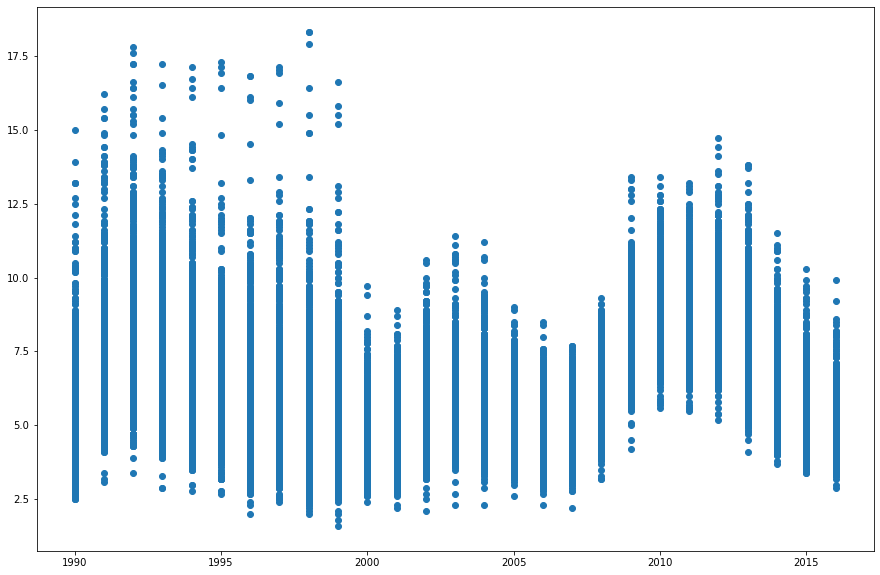

In [6]:
plt.figure(figsize=(15,10))

plt.scatter(df_ny.Year, df_ny.Rate)

In [7]:
sorted(df_ny.Year.unique())

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [8]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [9]:
# Need to sort the values then fit, Normalization is remaining, Look into Timeseries analysis

In [10]:
reg.fit(df_ny.Year.values[None][:, :15000].reshape(-1,1), df_ny.Rate.values[None][:, :15000].reshape(-1,1))

LinearRegression()

In [11]:
preds = reg.predict(df_ny.Year.values[15000:][None].reshape(-1,1))

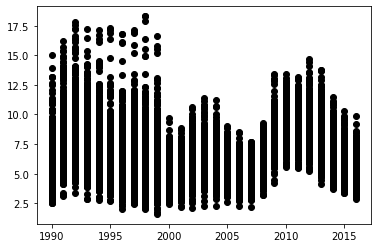

In [12]:
# Plot outputs
plt.scatter(df_ny.Year,df_ny.Rate ,  color='black')

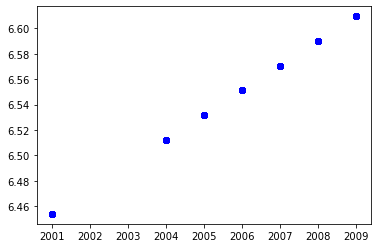

In [13]:
plt.scatter(df_ny.Year.values[15000:], preds.reshape((-1)), color='Blue', linewidth=1)

#### Import .shp file data for counties

In [21]:
shp_counties = Path("../data/UScounties/uscounties.shp")

c_map = geo.read_file(shp_counties)
c_map = c_map[c_map.STATE_NAME != 'Alaska']
c_map = c_map[c_map.STATE_NAME != 'Hawaii']
c_map.rename(columns={'NAME':'County'}, inplace=True)
c_map.drop(columns='STATE_NAME', inplace=True)

In [22]:
c_map.head()

,County,STATE_FIPS,CNTY_FIPS,FIPS,geometry
0,Lake of the Woods,27,077,27077,"POLYGON ((-95.34283 48.54668, -95.34105 48.715..."
1,Ferry,53,019,53019,"POLYGON ((-118.85163 47.94956, -118.84846 48.4..."
2,Stevens,53,065,53065,"POLYGON ((-117.43883 48.04412, -117.54219 48.0..."
3,Okanogan,53,047,53047,"POLYGON ((-118.97209 47.93915, -118.97406 47.9..."
4,Pend Oreille,53,051,53051,"POLYGON ((-117.43858 48.99992, -117.03205 48.9..."


### Merge data to gain geo poly

In [38]:
df['County'] = [x.replace('County', '') for x in df.County][:]
m = df.merge(c_map, on='County', how='left', indicator=True)
# merge.dropna()
geodata = geo.geodataframe.GeoDataFrame(m, geometry=m.geometry)
m.head()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [34]:
print(geodata.shape)
print(df.shape)
print(m.shape)

(885548, 10)
(885548, 5)
(885548, 10)


### Plot with Slider

In [35]:
months = ["January", "February", "March","April", "May", "June", "July", "August","September", "October","November" , "December" ]
def plotmap(y, m):
    fig, ax = plt.subplots(1, figsize=(12,12))
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="5%", pad=0.1)
    c_map.boundary.plot(ax=ax, zorder=1)
    newdata = geodata[(geodata['Year'] == y) & (geodata['Month'] == m)]
    newdata.plot(column='Rate',ax=ax, legend=True, zorder=2, cax=cax)
    display(newdata.shape)
year_s = widgets.IntSlider(min=np.min(df.Year), max=np.max(df.Year), description="Year")
mon_s = widgets.Dropdown(options=months, description="Month", value="January")
widgets.interact(plotmap, y=year_s, m=mon_s)

interactive(children=(IntSlider(value=1990, description='Year', max=2016, min=1990), Dropdown(description='Mon…

<function __main__.plotmap(y, m)>